## Programming for Data Analysis - Project 2 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

### Data-cleansing ###

To begin, I will download the libraries I will use in this project. I will use pandas to create the dataframes which I will use to analyse the historical climate data:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

I have downloaded multiple climate related datasets online. These datasets were as follows:

- Atmospheric **carbon dioxide** concentratons from a report by the Intergovernmental Panel on Climate Change (IPCC); most recent year in dataset is 2001.

- Atmospheric **carbon dioxide** concentrations from a 2008 paper in Nature by Luthi et al; most recent year in dataset is 1870 (137 years prior to 2007)

- Atmospheric **carbon dioxide** data from the Mauna Loa Observatory in Hawaii, providing annual data from 1959 to 2022, when precise measurements of atmospheric carbon dioxide first began to be taken.

- **Temperature** estimates going back over 820,000 years based on the EPICA Dome C Ice Core Deuterium Data. EPICA stands for European Project for Ice Coring in Antarctica. It estimates past temperature using Deuterium as a proxy. Deuterium is a heavy form of hydrogen (containing a neutron in addition to the one proton found in "light" hydrogen). In colder periods weather, there tends to be less deuterium in ice cores than in warmer periods. The reason for this is that during warm periods, more of the lighter form of hydrogen is evaporated away from the surface of the ocean, so that when the moist air moves northwards to the poles, it contains a higher ratio of heavy hydrogen than it contains during cold periods; precipitation then contains more of this heavy hydrogen and this ultimately shows up in the ice cores. I will refer to this dataset as the "Jouzel" dataset for convenience (Jean Jouzel is a French glaciologist and climatologist who is one of the creators of the dataset)

With the exception of the Mauna Loa dataset, these datasets were not in csv format initially. To make it easier to create dataframes using pandas, I saved all my source files as csv files in my working directory. I will edit the dataframes using python before I analyse the data, including renaming column headings. I will also add extra columns to datasets to standardise the figures for time measurement and have the oldest years listed first, so my plots print from oldest years at the left to most recent years at the right.

Firstly, I will load up and amend the IPCC CO2 dataset:

In [25]:
df_co2_ipcc = pd.read_csv("CO2_ipcc_csv.csv")

# rename column names of existing dataframe (setting 'inplace' parameter equal to 'True')
df_co2_ipcc.rename(columns={'Gasage (yr BP) ': 'Year before 1950', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'sigma mean CO2'}, inplace=True) 

# here I am adding a new column called 'Years' to standardise the time measurements across different datasets.
# I am adding 73 years to every value in the 'years before 1950' column to effectively convert the column to 'years before 2023'. 
# I am then multiplying each year by minus 1, so that the column represents years "in the past"
df_co2_ipcc['Years'] = (df_co2_ipcc['Year before 1950'] + 73) * -1

# reversing the order of the dataset, to for the older years to appear on the left-hand side of the x-axis
df_co2_ipcc = df_co2_ipcc[::-1]

print(df_co2_ipcc)

      Year before 1950     CO2  sigma mean CO2      Years
1900         805668.87  207.29            2.20 -805741.87
1899         805132.44  202.23            0.69 -805205.44
1898         804522.67  204.86            1.64 -804595.67
1897         804009.87  207.50            0.92 -804082.87
1896         803925.28  202.92            2.06 -803998.28
...                ...     ...             ...        ...
4               -43.08  353.95            0.04     -29.92
3               -44.41  357.11            0.16     -28.59
2               -46.28  359.65            0.10     -26.72
1               -48.00  361.78            0.37     -25.00
0               -51.03  368.02            0.06     -21.97

[1901 rows x 4 columns]


Next, I will load up and amend the 2008 Nature paper dataset:

In [26]:
df_co2_nature = pd.read_csv("CO2_nature_csv.csv")

df_co2_nature.rename(columns={'EDC3_gas_a (yr)': 'Years ago', 'CO2 (ppmv)': 'CO2'}, inplace=True)

# Since the paper was written in 2007 and the most recent year in the associated dataset is 137 year prior, I have added 16
# years to the figure for "years ago" when creating the new column 'Years'
df_co2_nature['Years'] = (df_co2_nature['Years ago'] + 16) * -1

df_co2_nature = df_co2_nature[::-1]

print(df_co2_nature)

      Years ago    CO2   Years
1095     798512  191.0 -798528
1094     797099  188.4 -797115
1093     796467  189.3 -796483
1092     795202  195.2 -795218
1091     794608  199.4 -794624
...         ...    ...     ...
4           404  281.9    -420
3           395  279.1    -411
2           279  277.9    -295
1           268  274.9    -284
0           137  280.4    -153

[1096 rows x 3 columns]


Next I will load up the relatively small dataset of from Mauna Loa, containing data for atmospheric CO2 levels:

In [36]:
df_mauna_loa_csv = pd.read_csv("mauna_loa_csv.csv")


df_mauna_loa_csv.rename(columns={'year': 'year', 'mean': 'CO2', 'unc':'unc'}, inplace=True)

# I will create a new column called 'Years', to standardise the measurement of time across the datasets.
# I don't need to reverse the rows in this dataset since the earliest year is already in the first row.
df_mauna_loa_csv['Years'] = (2023 - df_mauna_loa_csv['year']) * -1

print(df_mauna_loa_csv)

    year     CO2   unc  Years
0   1959  315.98  0.12    -64
1   1960  316.91  0.12    -63
2   1961  317.64  0.12    -62
3   1962  318.45  0.12    -61
4   1963  318.99  0.12    -60
..   ...     ...   ...    ...
59  2018  408.72  0.12     -5
60  2019  411.65  0.12     -4
61  2020  414.21  0.12     -3
62  2021  416.41  0.12     -2
63  2022  418.53  0.12     -1

[64 rows x 4 columns]


Next, the "Jouzel" temperature data inferred from deuterium levels in ice cores from EPICA Dome C:

In [ ]:
df_temp_jouzel_csv = pd.read_csv("temp_jouzel_csv.csv")

df_temp_jouzel_csv.rename(columns={'bag': 'bag', 'ztop': 'depth', 'EDC3béta': 'Years before 1950', 'AICC2012': 'year_new', 'deutfinal': 'deuterium', 'temp': 'temp_Kelvin', 'acc-EDC3beta' : 'acc-EDC3beta'}, inplace=True)

# adding a new column called 'Years' to standardise the measurement of time across datasets. The negative figure allows for my graph to print from
# oldest date to most recent
df_temp_jouzel_csv['Years'] = (df_temp_jouzel_csv['Years before 1950'] + 73) * -1

df_temp_jouzel_csv = df_temp_jouzel_csv[::-1]

print(df_temp_jouzel_csv)

In [ ]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - IPCC data')

sns.scatterplot(x ='Years', y = 'CO2', data = df_co2_ipcc, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x ='Years', y = 'CO2', data = df_co2_ipcc, color = 'green')

In [ ]:
plt.figure(figsize= (16,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years - Nature data')

sns.scatterplot(x='Years', y='CO2', data=df_co2_nature, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Years', y = 'CO2', data = df_co2_nature, color = 'blue')


#### Comparison of C02 datasets ####

To get a sense of the extent to which carbon dioxide levels may have increased in recent years compared to the long-term historical trends, I would ideally have a dataset which contains carbon-dioxide data from the distant past right up to the present day. 

Fortunately, I can obtain this by combining the data from the IPCC dataset with the more recent data from the Mauna Loa dataset. 

Firstly, I want give myself some confidence that the long-term historical data in the IPCC dataset is valid; to do this, I will compare it with the 2008 Nature dataset by creating plot a lineplot for each dataset on the same graph:

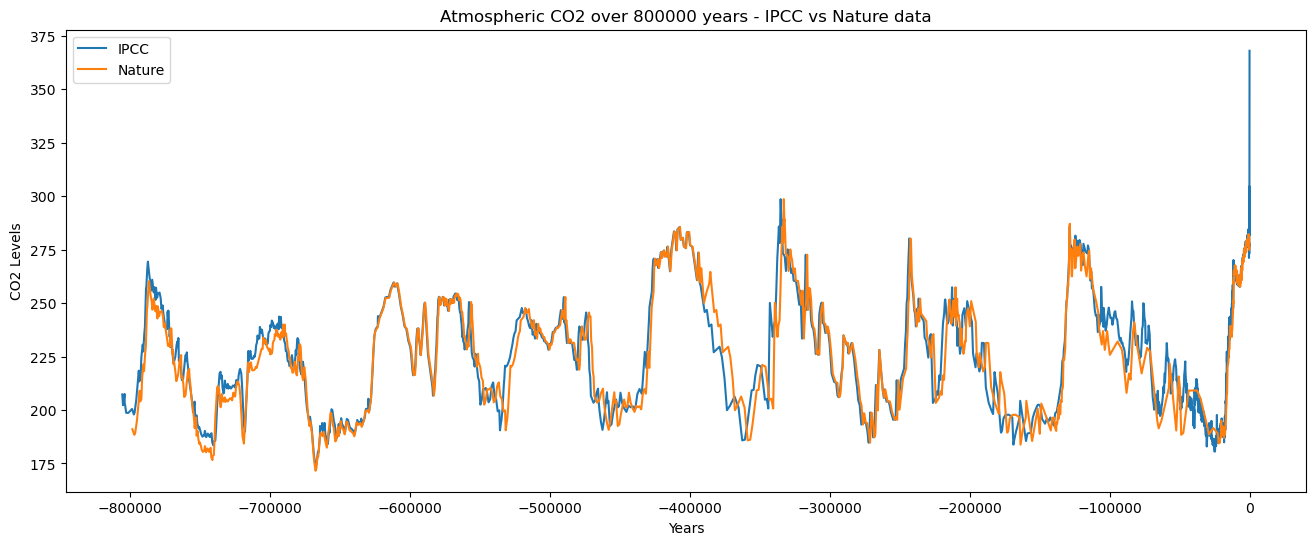

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize= (16,6))

sns.lineplot(x='Years', y='CO2', data=df_co2_ipcc, label='IPCC')

sns.lineplot(x='Years', y='CO2', data=df_co2_nature, label='Nature')

plt.title('Atmospheric CO2 over 800000 years - IPCC vs Nature data')
plt.xlabel('Years')
plt.ylabel('CO2 Levels')

plt.legend()

plt.show()

plt.savefig('C02_IPCC_vs_Nature.png')

We see that the datasets are largely in agreement with one another. The Nature data ends in 1870, while the IPCC data continues on to 2001, and the large spike in carbon dioxide levels seen on the right hand-side of the graph relates to these additional years present in the IPCC data.

I will now combine the IPCC data with the Mauna Loa data to create a new dataframe containing data for carbon dioxide levels from 805,741 years ago to today:

In [59]:
# First I will create a sub-dataframe containing CO2 data relating to 2002 onwards
df_post_2001_mauna_loa = df_mauna_loa_csv.loc[df_mauna_loa_csv['Years'] > -22 ]

# creating a new dataframe from the mauna loa data, containing only the two columns of interest 'CO2' and 'Years'
# to avoid getting a warning for 'chained indexing', I followed the syntax as found in this link : 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
df_post_2001_mauna_loa_trimmed = df_post_2001_mauna_loa.loc[:, ('Years', 'CO2')]

# I am converting the figures in the years columns to float to avoid getting a warning message when I combine the data from the
# 'Years' data from the IPCC dataset, which is in float format
df_post_2001_mauna_loa_trimmed['Years'] = df_post_2001_mauna_loa_trimmed['Years'].astype(float)

#print(df_post_2001_mauna_loa_trimmed)

# creating a new dataframe from the IPCC data, containing only the two columns of interest 'CO2' and 'Years'
df_co2_ipcc_trimmed = df_co2_ipcc.loc[:, ('Years', 'CO2')]

#print(df_co2_ipcc_trimmed)

df_co2 = pd.merge(df_co2_ipcc_trimmed, df_post_2001_mauna_loa_trimmed, on = 'Years', how = 'outer')

# The merge produces two columns: C02_x relating to the IPCC data and CO2_y relating to the Manua Loa data.
# Here I am merge these two columns using the combine_first method: this creates a new column where missing/ NaN values
# from one column are replaced with the corresponding non-null value from the other column

df_co2['CO2'] = df_co2['CO2_x'].combine_first(df_co2['CO2_y'])

# Here I am dropping the unwanted columns CO2_x and CO2_y. the axis = 1 parameter is used to specify that it is a column being
# dropped as opposed to a row
df_co2 = df_co2.drop(['CO2_x', 'CO2_y'], axis = 1)

print(df_co2)

          Years     CO2
0    -805741.87  207.29
1    -805205.44  202.23
2    -804595.67  204.86
3    -804082.87  207.50
4    -803998.28  202.92
...         ...     ...
1917      -5.00  408.72
1918      -4.00  411.65
1919      -3.00  414.21
1920      -2.00  416.41
1921      -1.00  418.53

[1922 rows x 2 columns]


### CO2 versus Temperature Anomoly ###

### CH4 versus Temperature Anomoly ###

### Climate change signals in the Irish context ###

### Fusion of datasets ###

### Prediction of Global Temperature Anomoly ###

### Accelerating increases of temperature ###

### Summary ###

### References ###